# Evaluating Classifiers

The first model predicts a high risk of cancer for 800 out of 1000 patients’ images in the test set. 
Of these 800 images 50 actually show signs of skin cancer. 
Hence, all problematic images are correctly identified.


In [24]:
TP = 50   # True Positive
TN = 200  # True Negative
FP = 750  # False Positive
FN = 0
correct = TP + TN
total = 1000

correct / total

0.25

In [25]:
precision = TP / (TP + FP)
precision # bad, makes a lot of false alarms

0.0625

In [26]:
recall = TP / (TP + FN)
recall  # really good, it catches all the cancers

1.0

The second classifier categorizes 100 out of 1000 images into the high risk group. 
40 of the 100 images show real signs of cancer. 10 images are not identified and falsely classified as low-risk.



In [27]:
TP = 40
TN = 890
FN = 10  # we predict healthy but it is cancer
FP = 60  # we predict cancer but it is healthy

(TP + TN) / 1000

0.93

In [28]:
precision = TP / (TP + FP)
precision

0.4

In [29]:
recall = TP / (TP + FN)
recall  # good, but not that great for cancer detection

0.8

In [30]:
# "everybody is healthy"
TP = 0
TN = 950
FN = 50   # we predict healthy but it is cancer
FP = 0  # we predict cancer but it is healthy

(TP + TN) / 1000

0.95

In [31]:
recall = TP / (TP + FN)
recall

0.0

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline

### 1. Load the data

In [35]:
df = pd.read_csv('data/penguins_simple.csv', sep=';')
df.shape

(333, 6)

### 2. Train-Test Split

In [36]:
X = df.iloc[:, 1:]
y = df['Species']

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

### 3. Define a ColumnTransformer

In [38]:
trans = ColumnTransformer([
    #('kristians_onehot', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['Sex']),
    #('kristians_scale', MinMaxScaler(), ['Body Mass (g)', 'Culmen Depth (mm)']),
    ('do_nothing', 'passthrough', ['Culmen Length (mm)']),
])

### 4. fit + transform training data

In [39]:
trans.fit(Xtrain)

Xtrain_transformed = trans.transform(Xtrain)  # result is a single numpy array
Xtrain_transformed.shape

(249, 1)

### 5. fit a LogReg model

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(Xtrain_transformed, ytrain)

LogisticRegression(max_iter=1000)

## Evaluation Metrics

In [41]:
from sklearn.metrics import accuracy_score, classification_report

ypred = model.predict(Xtrain_transformed)
acc = accuracy_score(ytrain, ypred)
round(acc, 3)

0.727

In [42]:
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

      Adelie       0.91      0.95      0.93       106
   Chinstrap       0.20      0.02      0.03        53
      Gentoo       0.59      0.88      0.71        90

    accuracy                           0.73       249
   macro avg       0.57      0.62      0.56       249
weighted avg       0.64      0.73      0.66       249



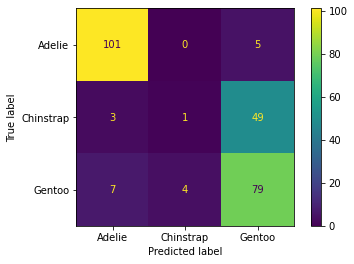

In [43]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, Xtrain_transformed, ytrain)

### 6. transform test data

In [44]:
Xtest_transform = trans.transform(Xtest)
Xtest_transform.shape

(84, 1)

In [45]:
#test acc
ypred = model.predict(Xtest_transform)
acc = accuracy_score(ytest, ypred)
round(acc, 3)

0.786

In [21]:
# training acc: 73%, test acc: 78.6%

### Interpretation

* training and test accuracy are good: everything OK
* training and test accuracy are bad: not OK, model does not work (underfitting)
* training accuracy good, test worse: not OK, model does not generalize (overfitting)
* test accuracy better thatn training: strange, sometimes in small datasets (sampling bias)

### Advanced: ROC Curve
very detailed but difficult to interpret

In [49]:
from sklearn.metrics import roc_curve

# works for Titanic but not for Penguins

probs = model.predict_proba(Xtrain_transformed)
roc_curve(ytrain, probs)

ValueError: multiclass format is not supported